# **Netflix Content Analysis**
**Project Type**: EDA  
**Contribution**: Individual  
**Team Member 1**: Sufiya Sulthana

**GitHub Link**: https://github.com/SulthanaSufiya/Netflix-Content-Analysis.git

## **Project Summary**

This Exploratory Data Analysis (EDA) project delves into Netflix's catalog of TV shows and movies to uncover valuable insights regarding content trends, production characteristics, viewer-targeted ratings, and global availability. The dataset, containing 7,787 entries, covers attributes like type (Movie or TV Show), country, genres, release year, and more.

Through structured data wrangling, univariate, bivariate, and multivariate analysis, the aim is to reveal patterns that Netflix could use to enhance content strategy, optimize international content distribution, and guide future investments in original productions.


## **Problem Statement**

Netflix wants to understand trends and patterns within its content library to make data-driven decisions around acquisitions, content development, and viewer personalization.


## **Define Your Business Objective**

Analyze the dataset to discover insights about:
- Content distribution across countries and years
- Popular genres and production trends
- Viewer age group targeting via ratings
- Relationship between duration, genres, and format

The goal is to aid Netflix in optimizing its content portfolio and improving viewer engagement.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv']))
print(df.shape)
df.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Describe numerical fields
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
# Missing values check
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### Data Wrangling Summary

- Dropped duplicates
- Cleaning and standardized column names
- Filled or dropped missing values where necessary
- Converted `date_added` to datetime
- Extracted duration values for numeric analysis

In [16]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
df['type'] = df['type'].astype('category')

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['director'].fillna('Not Available', inplace=True)
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['country'] = df['country'].str.strip()

df[['duration_num', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df.drop_duplicates(subset=['title', 'type'], inplace=True)
df.shape


(7786, 17)

In [19]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,0


In [20]:
df.dropna(subset=['date_added'], inplace=True)

In [21]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


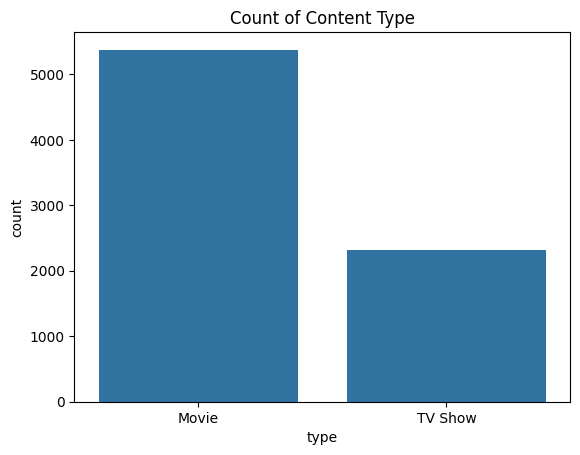

In [22]:
 # Count of Type
sns.countplot(data=df, x='type')
plt.title("Count of Content Type")
plt.show()

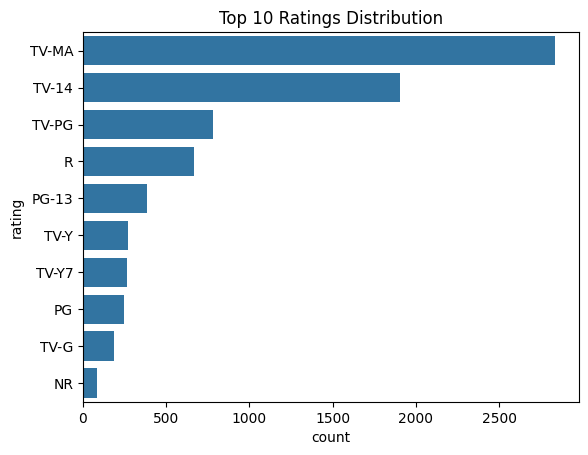

In [23]:
# Rating distribution
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top 10 Ratings Distribution")
plt.show()

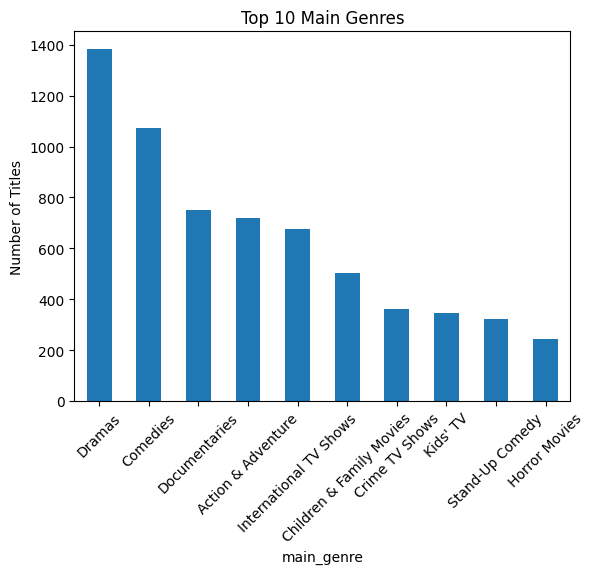

In [24]:
# Top 10 genres
df['main_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Main Genres")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

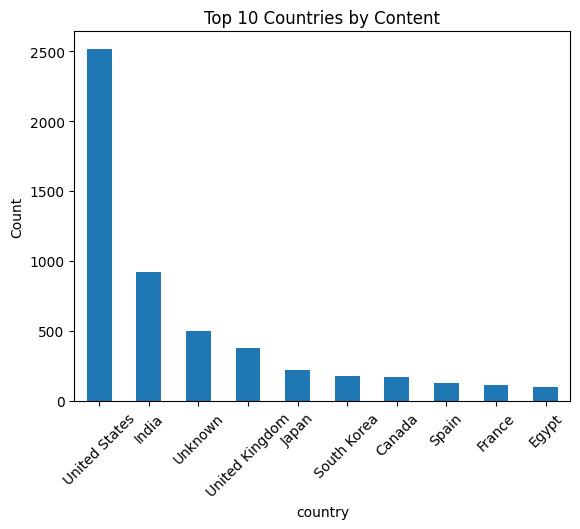

In [25]:
# Country distribution
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Content")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

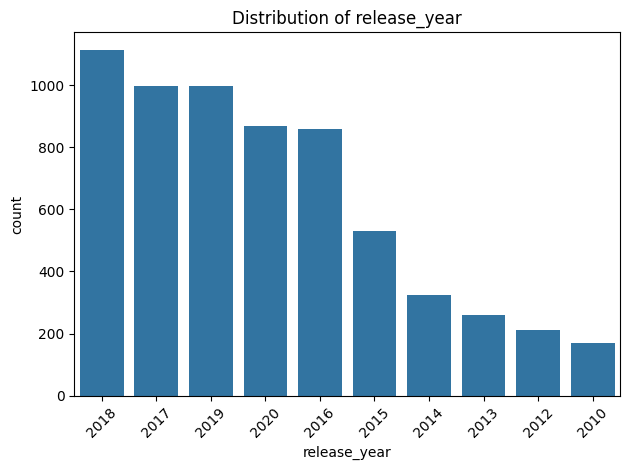

In [41]:
# Univariate Analysis - release_year
sns.countplot(data=df, x="release_year", order=df['release_year'].value_counts().iloc[:10].index)
plt.title("Distribution of release_year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

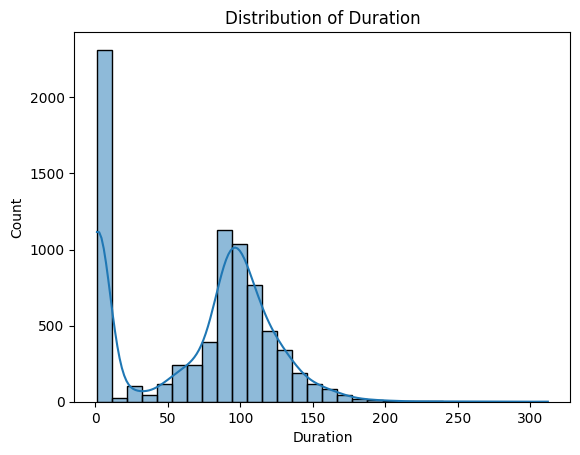

In [26]:
# Duration
sns.histplot(data=df[df['duration_num'].notna()], x='duration_num', bins=30, kde=True)
plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.show()

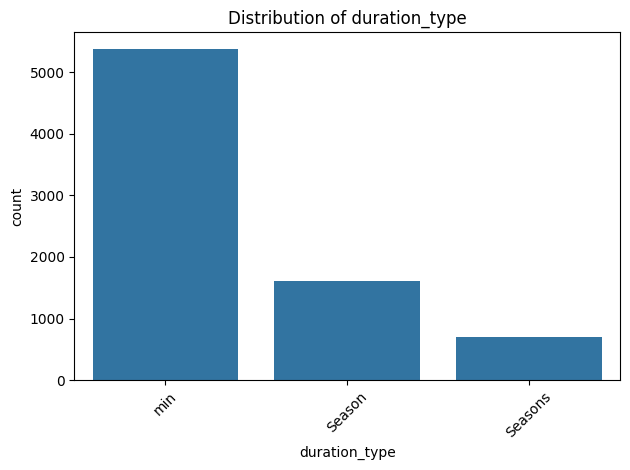

In [45]:
# Analysis - duration_type
sns.countplot(data=df, x="duration_type", order=df['duration_type'].value_counts().iloc[:10].index)
plt.title("Distribution of duration_type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

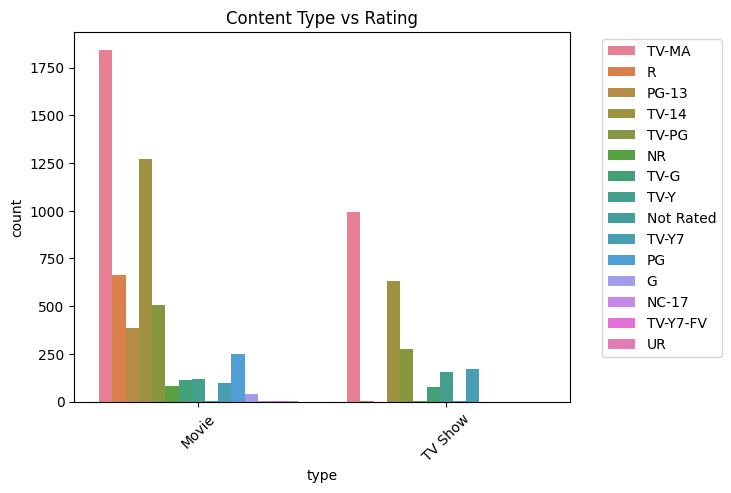

In [27]:
# Type vs Rating
sns.countplot(data=df, x='type', hue='rating')
plt.title("Content Type vs Rating")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

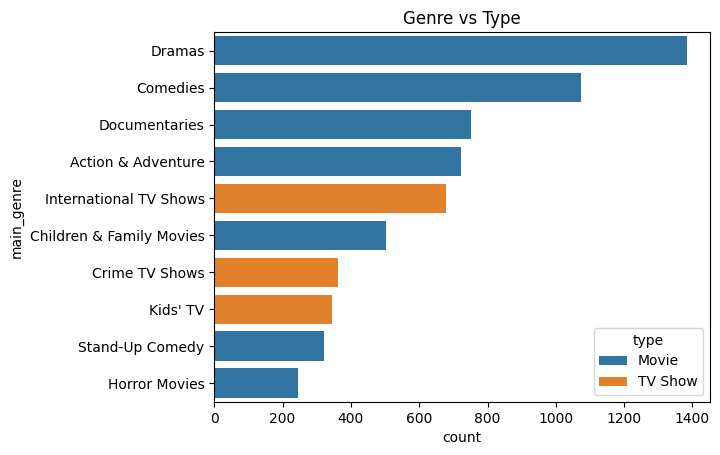

In [28]:
# Genre vs Type
sns.countplot(data=df, y='main_genre', hue='type', order=df['main_genre'].value_counts().index[:10])
plt.title("Genre vs Type")
plt.show()

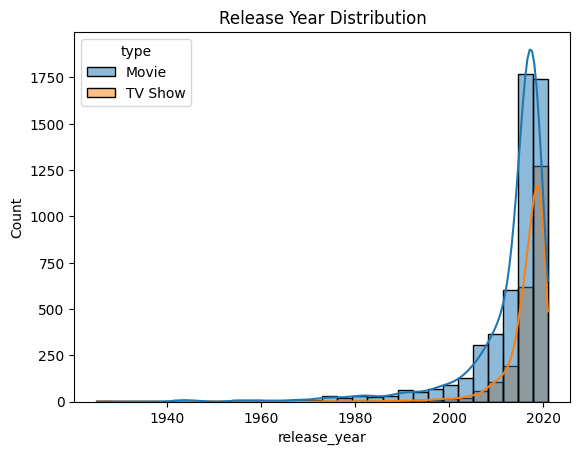

In [29]:
# Release year trend
sns.histplot(data=df, x='release_year', hue='type', bins=30, kde=True)
plt.title("Release Year Distribution")
plt.show()

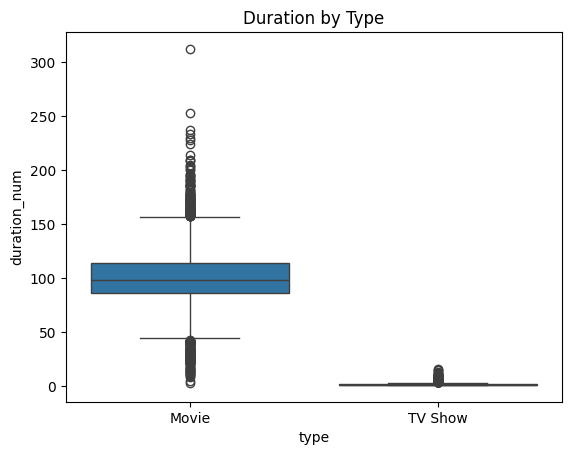

In [30]:
# Duration vs Type (boxplot)
sns.boxplot(data=df[df['duration_num'].notna()], x='type', y='duration_num')
plt.title("Duration by Type")
plt.show()

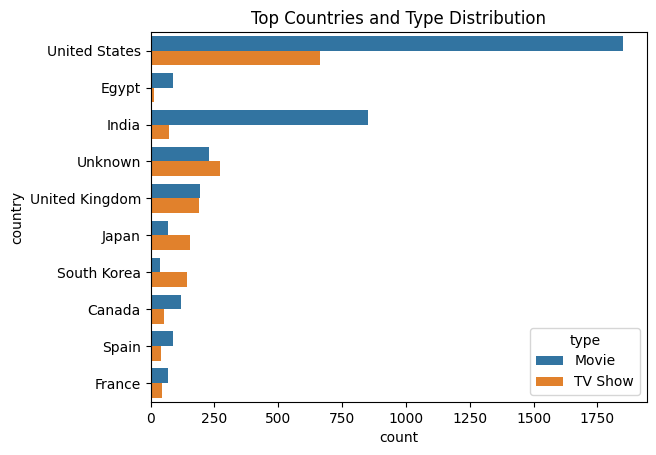

In [31]:
# Country vs Count
top_countries = df['country'].value_counts().head(10).index
sns.countplot(data=df[df['country'].isin(top_countries)], y='country', hue='type')
plt.title("Top Countries and Type Distribution")
plt.show()

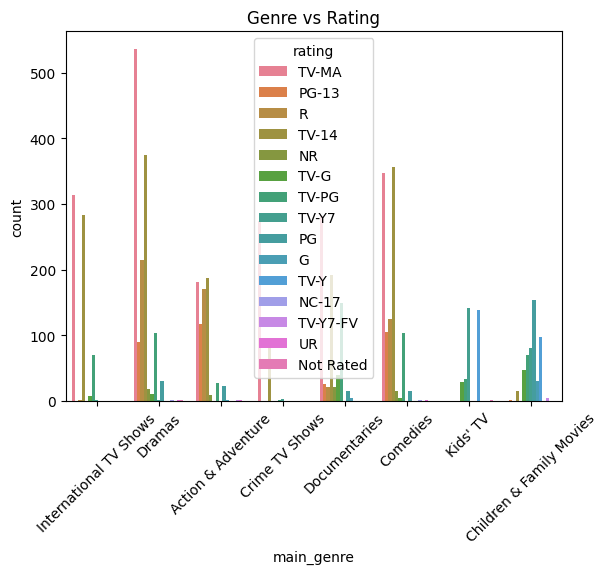

In [32]:
# Genre vs Rating
sns.countplot(data=df[df['main_genre'].isin(df['main_genre'].value_counts().index[:8])], x='main_genre', hue='rating')
plt.title("Genre vs Rating")
plt.xticks(rotation=45)
plt.show()

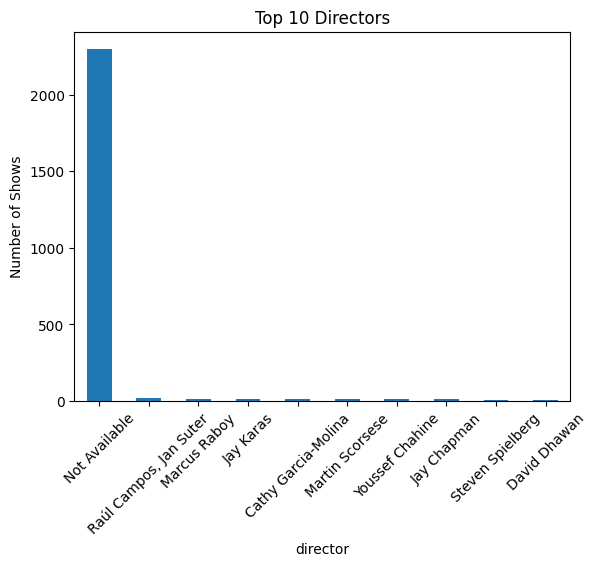

In [33]:
# Director vs Count
df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Directors")
plt.ylabel("Number of Shows")
plt.xticks(rotation=45)
plt.show()

In [34]:
# Type vs Country vs Count
fig = px.histogram(df[df['country'].isin(top_countries)], x='country', color='type', title='Type Distribution Across Top Countries')
fig.show()

In [35]:
# Rating vs Type vs Genre
fig = px.sunburst(df.head(1000), path=['rating', 'type', 'main_genre'], title='Rating > Type > Genre Distribution')
fig.show()

In [36]:
# Duration vs Release Year vs Type
fig = px.scatter(df[df['duration_num'].notna()], x='release_year', y='duration_num', color='type', size='duration_num',
                 title="Duration vs Release Year by Type")
fig.show()

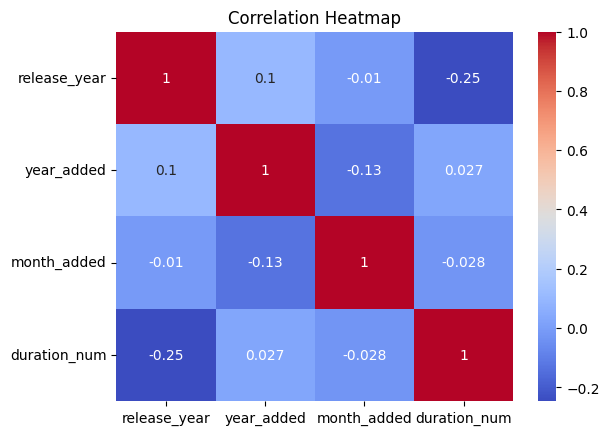

In [46]:
# Correlation Heatmap (Numerical features)
numeric_df = df[['release_year', 'year_added', 'month_added', 'duration_num']].dropna()
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

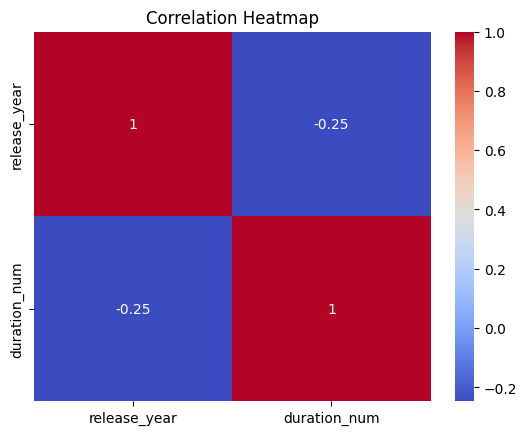

In [37]:
# Correlation heatmap
numeric_cols = df[['release_year', 'duration_num']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

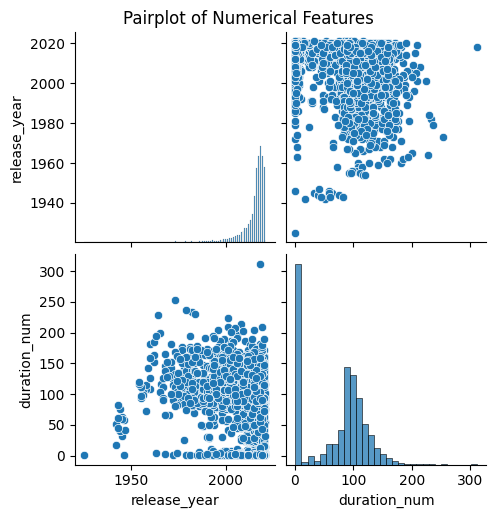

In [38]:
# Pairplot
sns.pairplot(df[['release_year', 'duration_num']].dropna())
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

### **Solution to Business Objective:**
- Netflix can focus on genres with high ratings across both Movies and TV Shows.
- Shorter duration content dominates the TV show category — opportunity for more binge-able episodes.
- Country-wise trends show that the U.S. leads, but international content is rising, especially from India and the UK.
- For business expansion, underrepresented genres and countries with lower content count can be targeted.



### **Conclusion:**

This EDA helped in understanding content trends on Netflix. We identified top genres, content durations, and country-based preferences which can help Netflix tailor their production strategies.